In [35]:
%matplotlib inline


# Creating a timeline with lines, dates, and text

How to create a simple timeline using Matplotlib release dates.

Timelines can be created with a collection of dates and text. In this example,
we show how to create a simple timeline using the dates for recent releases
of Matplotlib. First, we'll pull the data from GitHub.


In [36]:
import re
import sqlite3
from datetime import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np

con = sqlite3.connect('main.db')


if 0:
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
else:
    project_name = 'flask'
    sql = f'''
    select tag, date(creator_dt)
    from projects join releases on projects.id = releases.project_id
    where name = '{project_name}'
    '''
    raw_releases = con.execute(sql).fetchall()
    print(raw_releases[:3])
    dates = [row[1] for row in raw_releases]
    names = [row[0] for row in raw_releases]
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]



[('0.1', '2010-04-16'), ('0.10', '2013-06-13'), ('0.10.1', '2013-06-14')]


1.0
2.0.0


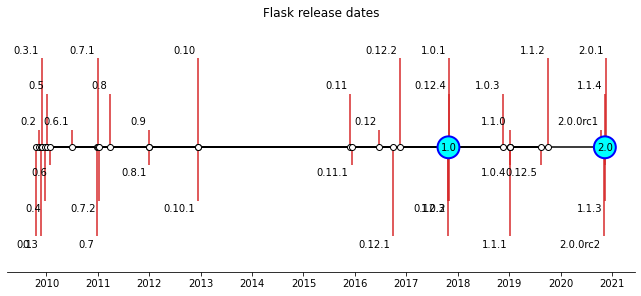

In [50]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="black", markerfacecolor="white")  # Baseline and markers on it.

releases = zip(dates, levels, names)
# ax.plot(dates, np.zeros_like(dates), "-o",
#         color="black", markerfacecolor="white")  # Baseline and markers on it.

def is_major(rel):
        return bool(re.match(r'[0-9]+\.0\.0$', rel) or re.match(r'[0-9]+\.0$', rel))

releases = list(zip(dates, levels, names))

# annotate minor releases with lines
min_style = dict(textcoords="offset points",
                horizontalalignment="right")
for a_date, a_level, name in releases:
        if is_major(name):
                continue
        ax.annotate(name, xy=(a_date, a_level),
                xytext=(-3, np.sign(a_level)*3),
                verticalalignment="bottom" if a_level > 0 else "top",
                **min_style)

# major release gets big blue circle
major_style = dict(
        size=10, ha="center", va="center", # rotation=45, 
        bbox=dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
)
for a_date, a_level, name in releases:
        if not is_major(name):
                continue
        print(name)
        major_name = name[:3] # "major.0" only
        t = ax.text(
                a_date, 0, major_name, 
                **major_style)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax.set(title=f"{project_name.title()} release dates")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.margins(y=0.2)

plt.show()